In [5]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import random
import statistics

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [8]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [9]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

In [10]:
def calculateOutputSize(imgSize, kernelSize):
    return imgSize - kernelSize + 1;

In [11]:
def convolve(img, kernel):
    outputSize = calculateOutputSize(img.shape[0],kernel.shape[0])
    k = kernel.shape[0]
    convolvedImage = np.zeros(shape=(outputSize, outputSize))
    for rowIndex in range(outputSize):
        for colIndex in range(outputSize):
            mat = img[rowIndex:rowIndex+k, colIndex:colIndex+k]
            convolvedImage[rowIndex, colIndex] = np.sum(np.multiply(mat, kernel))
            
    return convolvedImage

In [12]:
# X_train_convolve = []

# for img in X_train:
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     #img = convolve(img,blur)
#     X_train_convolve.append(img)

In [13]:
# X_train_convolve = np.array(X_train_convolve)

In [14]:
# X_test_convolve = []
# for img in X_test:
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     #img = convolve(img,blur)
#     X_test_convolve.append(img)

In [15]:
# X_test_convolve = np.array(X_test_convolve)  

In [16]:
# train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 2) | (Y_train == 3) | (Y_train == 4))
# test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 2) | (Y_test == 3) | (Y_test == 4))

In [17]:
train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 2))
test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 2))

In [18]:
X_train_filter, Y_train_filter = X_train[train_filter], Y_train[train_filter]
X_test_filter, Y_test_filter = X_test[test_filter], Y_test[test_filter]

In [19]:
train_filter_0 = np.where(Y_train == 0)
test_filter_0 = np.where(Y_test == 0)

X_train_filter_0 , Y_train_filter_0 = X_train[train_filter_0],Y_train[train_filter_0]
X_test_filter_0 , Y_test_filter_0 = X_test[test_filter_0] , Y_test[test_filter_0]

In [20]:
train_filter_1 = np.where(Y_train == 1)
test_filter_1 = np.where(Y_test == 1)

X_train_filter_1 , Y_train_filter_1 = X_train[train_filter_1],Y_train[train_filter_1]
X_test_filter_1 , Y_test_filter_1 = X_test[test_filter_1] , Y_test[test_filter_1]

In [21]:
# train_filter_3 = np.where(Y_train == 3)
# test_filter_3 = np.where(Y_test == 3)

# X_train_filter_3 , Y_train_filter_3 = X_train[train_filter_3],Y_train[train_filter_3]
# X_test_filter_3 , Y_test_filter_3 = X_test[test_filter_3] , Y_test[test_filter_3]

In [22]:
# train_filter_4 = np.where(Y_train == 4)
# test_filter_4 = np.where(Y_test == 4)

# X_train_filter_4 , Y_train_filter_4 = X_train[train_filter_4],Y_train[train_filter_4]
# X_test_filter_4 , Y_test_filter_4 = X_test[test_filter_4] , Y_test[test_filter_4]

In [23]:
train_filter_2 = np.where(Y_train == 2)
test_filter_2 = np.where(Y_test == 2)

X_train_filter_2 , Y_train_filter_2 = X_train[train_filter_2],Y_train[train_filter_2]
X_test_filter_2 , Y_test_filter_2 = X_test[test_filter_2] , Y_test[test_filter_2]

In [24]:
# Normalize the Images

In [25]:
X_train_filter = X_train_filter/255.0
X_test_filter = X_test_filter/255.0

In [26]:
X_train_filter_0 = X_train_filter_0/255.0
X_test_filter_0 = X_test_filter_0/255.0

In [27]:
X_train_filter_2 = X_train_filter_2/255.0
X_test_filter_2 = X_test_filter_2/255.0

In [28]:
X_train_filter_1 = X_train_filter_1/255.0
X_test_filter_1 = X_test_filter_1/255.0

In [29]:
# X_train_filter_3 = X_train_filter_3/255.0
# X_test_filter_3 = X_test_filter_3/255.0

In [30]:
# X_train_filter_4 = X_train_filter_4/255.0
# X_test_filter_4 = X_test_filter_4/255.0

In [31]:
X_train_filter_0[1].shape

(28, 28)

In [32]:
# Flattening the Input

In [33]:
def flattenInput(mat):
        mat = mat.flatten()
        mat = mat.reshape(mat.shape[0],1)
        return mat

In [34]:
# Weight Initialization(Random,Normalized)

In [35]:
def weightInitialization(rows , cols, type = "random"):
    if(type == "random"):
        initialWeights = np.random.random(size = (rows,cols))
    else:
        initialWeights = np.random.normal(size = (rows,cols))
    initialWeights = initialWeights.reshape(rows,cols)
    return initialWeights

In [36]:
weights = weightInitialization(784,20,"normalize")

In [37]:
weights.shape

(784, 20)

In [38]:
# Manipulating the Array

In [39]:
def manipulatingTheArray(mat):
    mat = flattenInput(mat)
    
    for index in range(mat.shape[0]): 
        if mat[index] == 0:
            mat[index] = -0.002
    return mat

In [40]:
# Thresholding Weight

In [41]:
def thresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.8:
            out[0][item] = 0.8
        elif out[0][item] >= 0.5 and out[0][item] < 0.8:
            out[0][item] = 0.5
        elif out[0][item] > 0.1 and out[0][item] < 0.5:
            out[0][item] = 0.3
        else:
            out[0][item] = 0.1
    return out

In [42]:
def ActThresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.9:
            out[0][item] = 0.9
        else:
            out[0][item] = -0.9
    return out

In [43]:
# Threshold Check

In [44]:
def crossThreshold(out,neuronThreshold):
    flag = 0
    for item in range(out.shape[1]):
        if out[0][item] > neuronThreshold[0][item]:
            neuronThreshold[0][item] += 0.2
            flag = 1
    
    if flag == 1:
        return True
    return False

In [45]:
def crossThresholdUpdate(afterActivation,neuronThreshold):
    flag = 0
    for item in range(afterActivation.shape[1]):
        if afterActivation[0][item] > 0.8:
            neuronThreshold[0][item] += 0.002
            afterActivation[0][item] = 0
        else:
            afterActivation[0][item] = afterActivation[0][item] - 0.001
            #neuronThreshold[0][item] -= 0.001
            
    return afterActivation,neuronThreshold

In [46]:
# Weight Threshold (Future Reference)

In [47]:
def weightThreshold(weight):
    for indexi in range(weight.shape[0]):
        for indexj in range(weight.shape[1]):
            if weight[indexi][indexj] >= 1:
                weight[indexi][indexj] = 1
    return weight

In [48]:
# Calculate Accuracy

In [49]:
def accuracy(data,finalWeight):
    predict_0 = []
    predict_7 = []
    for item in data:
        item = flattenInput(item)
        res = np.dot(item.T,finalWeight)
        res = np.median(res)
        if res >= 55 and res <= 85:
            predict_0.append(1)
        elif res >=30 and res <55:
            predict_7.append(1)
    return len(predict_0), len(predict_7)

In [50]:
# Print Results

In [51]:
def printResults(inputImage,finalWeight):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        #item = manipulatingTheArray(item)
        result.append(np.dot(item.T,finalWeight))
    return result

In [52]:
def printResultsBlock(inputImage,weight):
    result = []
    resultSum = []
    for item in inputImage:
        item = flattenInput(item)
        #item = manipulatingTheArray(item)
        
        startIndex = 0
        blockSize = 7
        pval = 0
        resultRow = []
        sum_ = 0
        while(startIndex < 784):
            image_ = item[startIndex:startIndex + blockSize]
            weight_ = weight[startIndex : startIndex + blockSize]
                
            resultDotProduct = np.dot(image_.T,weight_)
            sum_ = sum_ + resultDotProduct
            resultRow.append(resultDotProduct)
            startIndex += blockSize
            
        result.append(resultRow)
        resultSum.append(sum_)
    return result , resultSum



In [115]:
def printResultsBlockIncludingAnotherLayer(inputImage,weight1,weight2):
    result = []
    resultSum = []
    for item in inputImage:
        item = flattenInput(item)
        #item = manipulatingTheArray(item)
        
        startIndex = 0
        blockSize = 28
        pval = 0
        resultRow = []
        sum_ = 0
        while(startIndex < 784):
            image_ = item[startIndex:startIndex + blockSize]
            weight_ = weight1[startIndex : startIndex + blockSize]
                
            resultDotProduct = np.dot(image_.T,weight_)
            sum_ = sum_ + resultDotProduct
            resultRow.append(resultDotProduct)
            startIndex += blockSize
            
        #result.append(resultRow)
        
        resultRow = np.array(resultRow)
        ans = np.dot(resultRow.T,weight2)
        result.append(ans)
        
    return result , resultRow


In [116]:
def printResults2(inputImage,weight1,weight2):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        out = np.dot(item.T,weight1)
        out = np.dot(out,weight2)
        result.append(out)
    return result

In [117]:
testFlatten = []

for image_ in X_test:
        image_ = flattenInput(image_)
        testFlatten.append(image_)

In [118]:
def convertToBinary(activation,neuronThreshold):
    for index in range(activation[0].shape[0]):
        
        if activation[0][index] > neuronThreshold[0][index]:
            activation[0][index] = 0.9
        else:
            
            activation[0][index] = 0.001
            
    return activation

In [119]:
def binaryConversion(image):
    
    for index in range(image.shape[0]):
        if image[index] != 0:
            image[index] = 1
    
    return image

In [120]:
testFlatten[0].shape

(784, 1)

In [121]:
x = np.full((4),1)

In [122]:
x

array([1, 1, 1, 1])

In [123]:
# Weight Update

In [124]:
def weightUpdateContainingMemoryElement(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    out = np.array(0)
    alpha =1e-5 #4 
    beta = 1e-7 #5
     # alpha , beta = 1e-3 , 1e-2 
    # alpha ,beta = 1e-1,1e-2 best values
    
    thresholdNeurons = np.full((1,20),0.02)
    for epoch_ in range(epoch):
            random.shuffle(flattenImage)
            for input_ in flattenImage:
                    out = alpha * np.dot(input_.T , weight) + out 
                    #out = ActThresholding(out)
                    inputM = manipulatingTheArray(input_)
                    weight = weight + beta * np.dot(input_,out)
                    weight = weightThreshold(weight)
                    if(crossThreshold(out,thresholdNeurons)):
                       out = 0.0
                    else:
                       out = out - beta * 0.01
            
            print(f"Epoch number {epoch_} finishes")
    return weight

In [125]:
def weightUpdateThresholding(epoch,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        image_ = binaryConversion(image_)
        flattenImage.append(image_)
    activation = np.array(0)
    alpha =1e-5 #4 
    beta = 1e-7 #5
    
    
    
    thresholdNeurons = np.full((1,200),0.02)
    for epoch_ in range(epoch):
            random.shuffle(flattenImage)
            for input_ in flattenImage:
                    activation = alpha * np.dot(input_.T , weight) + activation
                    #out = ActThresholding(out)
                    afterActivation = convertToBinary(activation,thresholdNeurons)
                    #weight = weight + beta * np.dot(input_,afterActivation)
                    
                    
                    
                    afterActivation , thresholdNeuron = crossThresholdUpdate(afterActivation,thresholdNeurons)
                    weight = weight + beta * np.dot(input_,afterActivation)
                    activation = afterActivation
            
            print(f"Epoch number {epoch_} finishes")
    return weight

In [126]:
def weightUpdateThresholding(epoch,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        image_ = binaryConversion(image_)
        flattenImage.append(image_)
    activation = np.array(0)
    alpha =1e-5 #4 
    beta = 1e-7 #5
    
    
    
    thresholdNeurons = np.full((1,201),0.02)
    for epoch_ in range(epoch):
            random.shuffle(flattenImage)
            for input_ in flattenImage:
                    activation = alpha * np.dot(input_.T , weight) + activation
                    #out = ActThresholding(out)
                    afterActivation = convertToBinary(activation,thresholdNeurons)
                    #weight = weight + beta * np.dot(input_,afterActivation
                    
                    afterActivation , thresholdNeuron = crossThresholdUpdate(afterActivation,thresholdNeurons)
                    weight = weight + beta * np.dot(input_,afterActivation)
                    activation = afterActivation
            
            print(f"Epoch number {epoch_} finishes")
    return weight

In [127]:
def multipleBlocks(epoch, inputImage, weight):
    flattenImage = []
    check  = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    #creating block of images
    #print(flattenImage[0])
    
    index = 0
    blockSize = 28
    
    alpha = 0.1
    for epoch_ in range(epoch):
        random.shuffle(flattenImage)
        for input_ in flattenImage:
            
            startIndex = 0
            errorFromThePreviousLevel = 0
            prevVal = 0
            val = 0
            pVal = 0
            while(startIndex < 784):
                image_ = input_[startIndex:startIndex + blockSize]
                weight_ = weight[startIndex : startIndex + blockSize]
                
                dotProduct =  np.dot(image_.T,weight_)
                
                if dotProduct  >= 5 and dotProduct < 1000:
                    for index in range(weight_.shape[0]):
                        check.append("increase")
                        if weight_[index] < 200:
                            weight_[index] = weight_[index] + alpha * dotProduct
                elif dotProduct < 2:
                     for index in range(weight_.shape[0]):
                        check.append("decrease")
                        if weight_[index] > -200:
                            weight_[index] = weight_[index] - alpha * dotProduct
                startIndex += blockSize
        
        print(f"Epoch : {epoch_} Completed")
    
    return weight , check


In [383]:
def multipleBlocksWithMemoryElement(epoch, inputImage, weight1 , weight2):
    flattenImage = []
    check  = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    
    index = 0
    blockSize = 28
    blockIndex = 0
    output = np.full((28,1),0)
    output2Layer = np.full((3,1),0)
    alpha = 0.1
    for epoch_ in range(epoch):
        random.shuffle(flattenImage)
        output.fill(0)
        output2Layer.fill(0)
        for input_ in flattenImage:
            
            startIndex = 0
            blockIndex = 0
            while(startIndex < 784):
                image_ = input_[startIndex:startIndex + blockSize]
                weight_ = weight1[startIndex : startIndex + blockSize]
                dotProduct =  np.dot(image_.T,weight_)
                output[blockIndex] = output[blockIndex] + dotProduct
                
                if dotProduct  >= 5 and dotProduct < 200:
                    for index in range(weight_.shape[0]):
                        if weight_[index] < 50 and weight_[index] > 0:
                            weight_[index] = weight_[index] + alpha * output[blockIndex]
                elif dotProduct < 5:
                     for index in range(weight_.shape[0]):
                        if weight_[index] > -50 and weight_[index] < 3:
                            weight_[index] = weight_[index] - alpha * output[blockIndex]
                startIndex += blockSize
                
                if(output[blockIndex] > 100):
                    output[blockIndex] = 0
                else:
                    output[blockIndex] = output[blockIndex] -  alpha * 0.9
                blockIndex += 1
            #print(output)
            output2nLayer = np.dot(output.T,weight2)
            output2Layer[0] = output2Layer[0] + output2nLayer[0][0]
            output2Layer[1] = output2Layer[1] + output2nLayer[0][1]
            output2Layer[2] = output2Layer[2] + output2nLayer[0][2]
            
            for index in range(3):
                if(output2Layer[index] > 200):
                    output2Layer[index] = 0
                else:
                    output2Layer[index] = output2Layer[index] -  alpha * 20
            #print(output2nLayer.shape)
            #print(output2nLayer)
            for outputNeuronIndex in range(output2nLayer.shape[1]):
                 #print(output2nLayer[0][outputNeuronIndex])
                if output2Layer[outputNeuronIndex] > 20:
                    for index in range(weight2.shape[0]):
                        #print(weight2[index][outputNeuronIndex])
                        if weight2[index][outputNeuronIndex] < 100 and output[index] > 0:
                            weight2[index][outputNeuronIndex] = weight2[index][outputNeuronIndex] + alpha * output2Layer[outputNeuronIndex] + alpha * output[index]
                            #weight2[index][outputNeuronIndex] = weight2[index][outputNeuronIndex] + alpha * output[]
                            #print(weight2[index][outputNeuronIndex]
                            
                else:
                    for index in range(weight2.shape[0]):
                        #print(weight2[index][outputNeuronIndex])
                        if weight2[index][outputNeuronIndex] > -100 and weight2[index][outputNeuronIndex] < 0:
                            weight2[index][outputNeuronIndex] = weight2[index][outputNeuronIndex] - alpha * output2Layer[outputNeuronIndex] - alpha * output[index]
                
                        
    #print(f"Epoch : {epoch_} Completed")
    return weight1 , weight2 , check , output


In [384]:
# 0.9 is working well
# 1.5

In [385]:
weight1 = weightInitialization(784,1)
weight2 = weightInitialization(28,3)

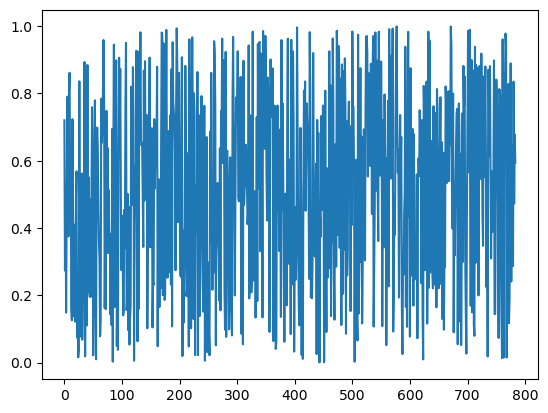

In [386]:
plt.plot(weight1)

In [387]:
print(weight1[456])
weight1 ,weight2, check , output= multipleBlocksWithMemoryElement(1,X_train_filter,weight1,weight2)

[0.57753118]


In [388]:
weight1

array([[ 7.20114944e-01],
       [ 2.73357471e-01],
       [ 5.28498999e-01],
       [ 1.48663729e-01],
       [ 4.51383993e-01],
       [ 7.89907815e-01],
       [ 7.90546163e-01],
       [ 3.74763834e-01],
       [ 8.08221960e-01],
       [ 8.61523912e-01],
       [ 4.89929811e-01],
       [ 6.47023954e-01],
       [ 1.65351577e-01],
       [ 1.25407500e-01],
       [ 7.23433247e-01],
       [ 4.26890467e-01],
       [ 1.36914935e-01],
       [ 4.09967926e-01],
       [ 2.87947719e-01],
       [ 1.21652799e-01],
       [ 4.77476676e-01],
       [ 5.68552007e-01],
       [ 7.38313758e-02],
       [ 1.76423070e-01],
       [ 1.54998529e-02],
       [ 3.81285755e-02],
       [ 8.36151078e-01],
       [ 7.62136161e-02],
       [ 2.64613838e-01],
       [-1.12677428e-04],
       [ 3.61916691e-01],
       [-1.32298701e-01],
       [-5.49111898e-03],
       [ 8.09738352e-02],
       [ 7.14500158e-02],
       [ 6.93508196e-01],
       [-1.81596284e-01],
       [ 3.26617855e-01],
       [ 1.8

In [390]:
weight2

array([[9.37946773e-01, 3.17441000e-01, 7.10784443e-01],
       [5.42911037e-01, 9.09190370e-01, 3.37233952e-01],
       [8.96446290e-01, 3.42729266e-01, 9.99531577e-01],
       [4.43539925e-01, 7.21614120e-01, 6.91108454e-01],
       [4.70480638e+00, 4.62333711e+00, 5.17671952e+00],
       [4.91334493e+00, 3.95045136e+00, 4.71929872e+00],
       [5.08414958e+00, 3.82287398e+00, 5.33951680e+00],
       [4.56869757e+00, 3.78002350e+00, 5.24997192e+00],
       [7.12101322e-01, 9.18418758e-01, 5.86206346e-01],
       [3.38923951e+01, 2.82027249e+01, 3.59550398e+01],
       [9.54355097e+00, 8.14943194e+00, 1.07849461e+01],
       [8.31655281e-01, 5.05129078e-02, 9.44917615e-01],
       [5.17186256e+00, 3.97653494e+00, 4.89765095e+00],
       [4.43976860e+00, 3.74424956e+00, 4.78513705e+00],
       [5.07738014e-01, 2.70812747e-01, 2.58083642e-01],
       [4.59780844e+00, 4.55142637e+00, 5.57832556e+00],
       [5.26252144e+00, 3.81244615e+00, 5.28726893e+00],
       [6.29540381e+01, 8.66764

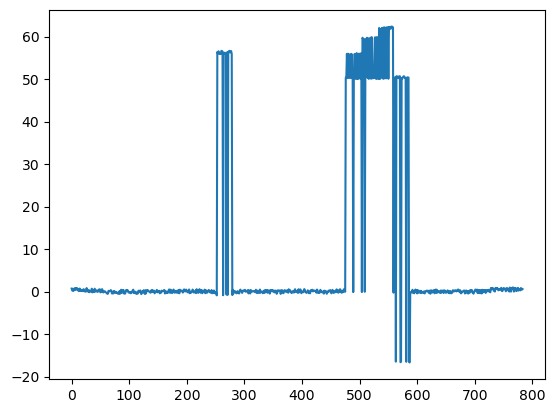

In [391]:
plt.plot(weight1)

In [392]:
weight1[456]

array([0.17753118])

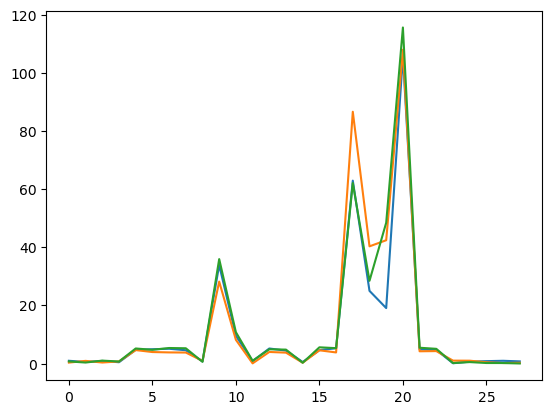

In [393]:
plt.plot(weight2)

In [394]:
def testingMemoryElementWork(inputImage,weight):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        result.append(np.dot(item.T,weight))
    return result

In [395]:
# weight1 = weightInitialization(784,200)
# weight1 = weightUpdateThresholding(10,X_train_filter,weight1)

In [396]:
# weight1 = weightInitialization(784,20)
# weight1 = weightUpdateContainingMemoryElement(2,1,X_train_filter,weight1)

In [397]:
weight1[572]

array([-16.49511374])

In [398]:
# Finding the Values for the Digits"

In [399]:
# results_0=printResults(X_train_filter_0,weight1)

# results_1=printResults(X_train_filter_1,weight1)
# results_2=printResults(X_train_filter_2,weight1)
# results_3=printResults(X_train_filter_3,weight1)
#results_4=printResults(X_train_filter_4,weight1)

In [400]:
#weight1

In [401]:
results_0 , resultRow_0 = printResultsBlockIncludingAnotherLayer(X_train_filter_0,weight1,weight2)

results_1 , resultRow_1 = printResultsBlockIncludingAnotherLayer(X_train_filter_1,weight1,weight2)
results_2  , resultRow_2 = printResultsBlockIncludingAnotherLayer(X_train_filter_2,weight1,weight2)

In [402]:
results_2[0]

array([[[ 99087.27587109, 132033.30232984, 118478.15944538]]])

In [403]:
resultRow_2

array([[[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[-6.25102743e-02]],

       [[ 6.56165991e-01]],

       [[ 3.44003174e-01]],

       [[ 3.76776035e-01]],

       [[ 2.04385109e-01]],

       [[-2.54005281e-01]],

       [[ 1.02166757e+02]],

       [[ 5.37631156e-01]],

       [[-1.12896427e-01]],

       [[-3.29100385e-01]],

       [[-3.99756918e-01]],

       [[ 2.97462381e-01]],

       [[-2.85813359e-01]],

       [[-2.72582093e-01]],

       [[ 4.76116700e+02]],

       [[ 4.62220869e+02]],

       [[ 5.02791307e+02]],

       [[ 2.94611931e+02]],

       [[-1.92176374e-01]],

       [[-5.71153170e-02]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]]])

In [404]:
results_0[0]

array([[[79087.19753566, 95110.85564802, 93006.17760951]]])

In [405]:
resultRow_0

array([[[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 4.86996631e-01]],

       [[ 7.08868607e-01]],

       [[ 9.11604101e-01]],

       [[ 1.00484844e-01]],

       [[ 2.18971890e-01]],

       [[ 3.28248761e+02]],

       [[ 8.56599415e-01]],

       [[ 2.84080252e-02]],

       [[ 1.06410409e+00]],

       [[ 2.13496074e-01]],

       [[-7.86069304e-01]],

       [[ 1.61644770e-01]],

       [[ 4.20019091e-01]],

       [[ 3.43990779e+02]],

       [[ 3.32071682e+02]],

       [[ 5.02141206e+02]],

       [[ 4.65849679e+02]],

       [[ 4.74380228e-01]],

       [[-4.14165400e-01]],

       [[ 5.09229617e-02]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]]])

In [406]:
resultRow_1

array([[[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 2.28352046e-01]],

       [[ 5.59992132e-01]],

       [[ 1.29154558e-01]],

       [[ 8.00414610e-02]],

       [[ 6.06282576e+01]],

       [[ 2.15349761e-02]],

       [[-3.96655712e-01]],

       [[-6.71705876e-02]],

       [[ 4.77547364e-01]],

       [[ 1.92692765e-01]],

       [[ 1.04493957e-01]],

       [[ 4.67029540e-01]],

       [[ 6.27575189e+01]],

       [[ 1.15401509e+02]],

       [[ 1.08338885e+02]],

       [[ 1.85777434e+01]],

       [[ 1.12787794e-01]],

       [[-9.59800551e-02]],

       [[ 2.87455462e-03]],

       [[ 3.30553052e-01]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]],

       [[ 0.00000000e+00]]])

In [407]:
results_1[0]

array([[[27267.9505514 , 37595.56233466, 34330.12748858]]])

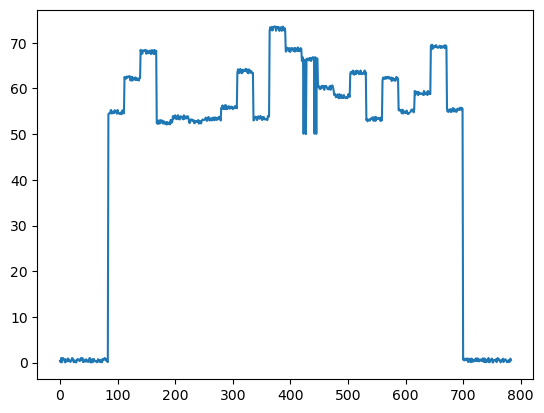

In [331]:
plt.plot(weight1)

In [1596]:
results_0 , resultSum_0 =printResultsBlock(X_train_filter_0,weight1)

results_1 , resultSum_1 =printResultsBlock(X_train_filter_1,weight1)
results_2 , resultSum_2 =printResultsBlock(X_train_filter_2,weight1)

In [1597]:
len(results_0[0])

112

In [1598]:
def findMaxNode(result):
    max_ = 0
    indices = []
    ansMode = []
    for images in result:
        max_index = -1
        max_ = 0
        for index in range(28):
            if(images[index] > max_):
                max_ = images[index]
                max_index = index
        
        indices.append(max_index)
        
    data = Counter(indices)
    mode = statistics.mode(indices)
    return data,indices,mode

In [1599]:
data_0 , indices_0 , mode_0 = findMaxNode(results_0)
data_1 , indices_1 , mode_1 = findMaxNode(results_1)
data_2 , indices_2 , mode_2 = findMaxNode(results_2)

In [1600]:
data_0

Counter({22: 1274,
         26: 2682,
         18: 776,
         21: 377,
         -1: 201,
         27: 461,
         19: 18,
         13: 9,
         25: 80,
         14: 5,
         6: 1,
         12: 1,
         20: 15,
         17: 3,
         24: 1,
         23: 1,
         16: 1,
         15: 14,
         5: 1,
         8: 2})

In [1601]:
mode_0

26

In [1602]:
data_1

Counter({23: 171,
         18: 1408,
         21: 697,
         27: 288,
         26: 2639,
         22: 1085,
         25: 76,
         20: 10,
         19: 232,
         16: 1,
         -1: 86,
         17: 21,
         13: 10,
         15: 8,
         6: 2,
         10: 2,
         14: 4,
         9: 1,
         24: 1})

In [1603]:
mode_1

26

In [1604]:
data_2

Counter({26: 1979,
         22: 676,
         20: 271,
         -1: 328,
         21: 586,
         27: 139,
         15: 30,
         18: 1740,
         10: 25,
         25: 83,
         13: 23,
         23: 1,
         14: 12,
         11: 1,
         9: 30,
         24: 7,
         6: 6,
         16: 7,
         12: 7,
         5: 3,
         17: 2,
         19: 2})

In [1605]:
mode_2

26

In [1606]:
#st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
#do this and maximum val and then go with variations

In [1607]:
#results_0=printResultsBlock(X_train_filter_0,weight1)
#results_1=printResultsBlock(X_train_filter_1,weight1)
#results_2=printResultsBlock(X_train_filter_2,weight1)
# results_3=printResultsBlock(X_train_filter_3,weight1)
# results_4=printResultsBlock(X_train_filter_4,weight1)

In [1608]:
#results_0

In [1609]:
#results_1

In [1610]:
#results_2

In [1611]:
#results_3

In [1612]:
meanOfTrainingData_0 = []
medianOfTrainingData_0 = []
for index in range(len(resultSum_0)):
    meanOfTrainingData_0.append(np.mean(resultSum_0[index]))
    medianOfTrainingData_0.append(np.median(resultSum_0[index]))
    trainingMeanValue_0 = np.mean(medianOfTrainingData_0)

In [1613]:
meanOfTrainingData_1 = []
medianOfTrainingData_1 = []
for index in range(len(resultSum_1)):
    meanOfTrainingData_1.append(np.mean(resultSum_1[index]))
    medianOfTrainingData_1.append(np.median(resultSum_1[index]))
    trainingMeanValue_1 = np.mean(medianOfTrainingData_1)

In [1614]:
meanOfTrainingData_2 = []
medianOfTrainingData_2 = []
for index in range(len(resultSum_2)):
    meanOfTrainingData_2.append(np.mean(resultSum_2[index]))
    medianOfTrainingData_2.append(np.median(resultSum_2[index]))
    trainingMeanValue_2 = np.mean(medianOfTrainingData_2)

In [1615]:
# meanOfTrainingData_3 = []
# medianOfTrainingData_3 = []
# for index in range(len(results_3)):
#     meanOfTrainingData_3.append(np.mean(results_3[index]))
#     medianOfTrainingData_3.append(np.median(results_3[index]))
#     trainingMeanValue_3 = np.mean(medianOfTrainingData_3)

In [1616]:
# meanOfTrainingData_4 = []
# medianOfTrainingData_4 = []
# for index in range(len(results_4)):
#     meanOfTrainingData_4.append(np.mean(results_4[index]))
#     medianOfTrainingData_4.append(np.median(results_4[index]))
#     trainingMeanValue_4 = np.mean(medianOfTrainingData_4)

In [1617]:
trainingMeanValue_0

7.49706901260388

In [1618]:
trainingMeanValue_1

2.6343196870644228

In [1619]:
trainingMeanValue_2

6.980979330476247

In [1620]:
# trainingMeanValue_3

In [1621]:
# trainingMeanValue_4

In [1622]:
outputTrainingValues = np.array([trainingMeanValue_0,trainingMeanValue_1,trainingMeanValue_2])#,trainingMeanValue_3,trainingMeanValue_4])

In [1623]:
outputTrainingValuesMax = np.array([9,10,17])

In [1624]:
# Prediction

In [1625]:
def prediction(data,finalWeight):
        predict = []
        for item in data:
            item = flattenInput(item)
            res = np.dot(item.T,finalWeight)
            res = np.median(res)
            distance = np.abs(outputTrainingValues - res)
            predict.append(np.argmin(distance))
        return predict

In [1626]:
def predictionBlocks(data,finalWeight):
        predict = []
        for item in data:
            item = flattenInput(item)
            res = np.dot(item.T,finalWeight)
            distance = np.abs(outputTrainingValues - res)
            predict.append(np.argmin(distance))
        return predict

In [1627]:
def predictionMax(data,finalWeight):
        predict = []
        results, resultSum = printResultsBlock(data,finalWeight)
        data_ , indices_ , mode_ = findMaxNode(results)
        predictMax = []
        combinedPred = []
        for index in range(len(results)):
            #print(resultSum[index])
            #print(indices_[index])
            distance = np.abs(outputTrainingValues - resultSum[index])
            distanceMax = np.abs(outputTrainingValuesMax - indices_[index]) 
            
            predict.append(np.argmin(distance))
            predictMax.append(np.argmin(distanceMax))
            
            
            #print(predictDist)
            #if indices_[index] == 21:
            #    predictMax.append(0)
            #elif indices_[index] == 6:
            #    predictMax.append(1)
            #elif indices_[index] == 19:
            #    predictMax.append(2)
            
           
                #predict.append(0)
                #if predictDist == 0 and predictMode == 1:
                #    predict.append(0)
                #elif predictDist == 1 and predictMode == 1:
                #    predict.append(1)
                #elif predictDist == 2 and predictMode == 1:
                #    predict.append(2)
        return predict , predictMax

In [1628]:
#pred = predictionBlocks(X_test_filter ,weight1)

In [1629]:
#pred = prediction(X_test_filter ,weight1)

In [1630]:
pred , predictMax =  predictionMax(X_test_filter,weight1)

In [1631]:
np.unique(pred)

array([0, 1, 2])

In [1632]:
np.unique(predictMax)

array([0, 1, 2])

In [1633]:
np.unique(Y_test_filter)

array([0, 1, 2], dtype=uint8)

In [1634]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    accuracy = 0
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
            accuracy = correct_predictions/len(y_true)
    return accuracy

In [1635]:
acc = compute_accuracy(Y_test_filter,pred)

In [1636]:
acc

0.5983476326660312

In [1637]:
acc = compute_accuracy(Y_test_filter,predictMax)

In [1638]:
acc

0.3158563711471242

# Calculating Individual Accuracies

In [760]:
def prediction_0(X, w):
    result = []
    res = printResultsBlock(X,w)
    indices = findMaxNode(res)
    
    for info in indices:
        if info == 8:
            result.append(0)
        else:
            result.append(-1)
    
    return result
        

In [761]:
pred_for_0 , predMax_0 = predictionMax(X_test_filter_0 ,weight1)

In [762]:
acc_0 = compute_accuracy(Y_test_filter_0,predMax_0)

In [763]:
acc_0

0.3295918367346939

In [764]:
pred_for_1 , predMax_1= predictionMax(X_test_filter_1 ,weight1)

In [765]:
acc_1 = compute_accuracy(Y_test_filter_1,predMax_1)

In [766]:
acc_1

0.5277533039647577

In [767]:
pred_for_2 , predMax_2 = predictionMax(X_test_filter_2,weight1)

In [768]:
acc_2 = compute_accuracy(Y_test_filter_2,predMax_2)

In [769]:
acc_2

0.6753875968992248

In [770]:
#pred_for_3 = prediction(X_test_filter_3,weight1)

In [771]:
#acc_3 = compute_accuracy(Y_test_filter_3,pred_for_3)

In [772]:
#acc_3

In [773]:
#pred_for_4 = prediction(X_test_filter_4,weight1)

In [774]:
#acc_4 = compute_accuracy(Y_test_filter_4,pred_for_4)

In [775]:
#acc_4

# Visualization

In [776]:
#medianOfTrainingData_0,medianOfTrainingData_1,medianOfTrainingData_4

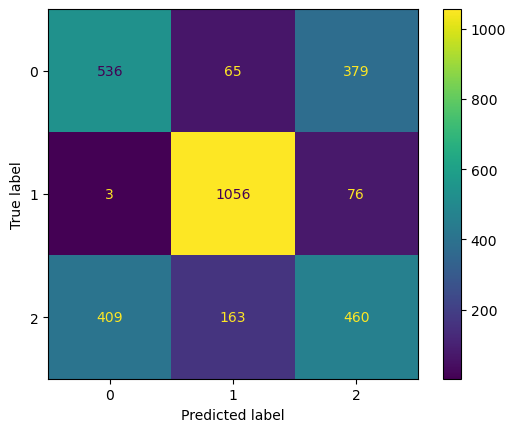

In [777]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(Y_test_filter,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1 ,2])

cm_display.plot()
plt.show()

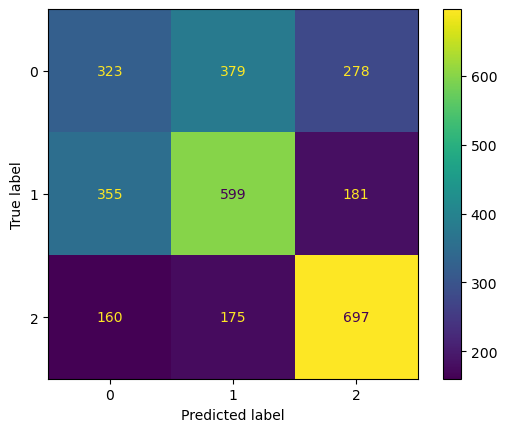

In [779]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(Y_test_filter,predictMax)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1 ,2])

cm_display.plot()
plt.show()

In [548]:
len(medianOfTrainingData_0)

5923

In [ ]:
if _name_ == "_main_":
    summary = []

    for key_size in key_sizes:
        attempts_list = []
        for i in range(total_runs):
            attempts = find_nonce(message, key_size)
            attempts_list.append(attempts)
        average_attempts = round(sum(attempts_list) / total_runs, 4)
        sum_ = 0
        for a in attempts_list:
            sum_ = sum_ + (a-average_attempts)**2)
        variance = sum_ / total_runs
        standard_deviation = round(variance ** 0.5, 4)
        summary.append((key_size, average_attempts, standard_deviation))